# **Social Network Analysis (SNA) of Ayodhya Verdict Twitter Network**

### Bhargav Mehta - MT2021029

### bhargav.mehta@iiitb.ac.in

Social network analysis (SNA) is the process of investigating social structures through the use of networks and graph theory. It characterizes networked structures in terms of nodes and links (relationships or interactions) that connect them.

We'll be using NetworkX, a Python package for creating, manipulating, and studying the structure of complex networks.

**Objectives**:
1. Find graph derivative value and analyze it
2. Find the most influential Twitter account.


In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


## dataset information

AYODHYAVERDICT_tweets.csv contains the mapping of 'user id' and Twitter 'account name'

AYODHYAVERDICT_follower_followee_network.csv contains the mapping of Twitter 'account name' and 'list of follower ids'.

pre-processing: Unwanted columns are removed from both the CSV files

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/#AYODHYAVERDICT_tweets.csv')
df

,user_id,screen_name
0,1179280919263186944,Prakash72091622
1,1179280919263186944,Prakash72091622
2,1113627067,warewolf999
3,1027888044307701761,Aayush74670776
4,762122872173191168,akmohanty07
...,...,...
195,179003453,chennak418
196,1095730132898246661,anu04706249
197,21191906,UnityInDiverse
198,719049254774247424,MALLERSOWMYA


In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/#AYODHYAVERDICT_follower_followee_network.csv')
df[['screen_name','followerIDs']]

,screen_name,followerIDs
0,Prakash72091622,"880332042726256640, 948498152105000961, 753116..."
1,warewolf999,"1638548772, 1127891108607008769, 2853505194,40..."
2,Aayush74670776,"917939806881112066, 2572507050, 11108658429490..."
3,akmohanty07,"731050037577289728, 1118888434716880896, 46179..."
4,PabanDa97908689,"1002535232506081285, 1105492568047906816, 1101..."
...,...,...
185,chennak418,NaN
186,anu04706249,NaN
187,UnityInDiverse,NaN
188,MALLERSOWMYA,NaN


## Importing dataset and network creation

In [6]:
# To create an empty graph
G = nx.Graph()

In [7]:
name_id_dict={}
id_name_dict={}
id_index={}
index_id={}
node_index=0
with open('/content/gdrive/MyDrive/#AYODHYAVERDICT_tweets.csv') as fp:
    for line_index, line in enumerate(fp):
      if line_index==0: #skips column headers
        continue
      result = [x.strip() for x in line.split(',')]
      name_id_dict[result[1]]=result[0] # name -> id
      id_name_dict[result[0]]=result[1] # id -> name
      if id_index.get(result[0])==None:
        id_index[result[0]]=node_index # id -> index
        index_id[node_index]=result[0] # index -> id
        node_index+=1

In [8]:
with open('/content/gdrive/MyDrive/#AYODHYAVERDICT_follower_followee_network.csv') as fp:
    for line_index, line in enumerate(fp):
      if line_index==0:
        continue
      result = [x.strip() for x in line.split('"')]
      if len(result)==3:
        followers = [x.strip() for x in result[1].split(',')]
      else:
        followers = []
      for f in followers:
        if id_index.get(f)==None:
          id_index[f]=node_index
          index_id[node_index]=f
          node_index+=1

In [9]:
adjacency_matrix = [] # A
for i in range(node_index):
    row = []
    for j in range(node_index):
        row.append(0)
    adjacency_matrix.append(row)

In [10]:
degree_matrix = [] # D
for i in range(node_index):
    row = []
    for j in range(node_index):
        row.append(0)
    degree_matrix.append(row)

In [11]:
indegree={}
total_degree={}
with open('/content/gdrive/MyDrive/#AYODHYAVERDICT_follower_followee_network.csv') as fp:
    for line_index, line in enumerate(fp):
      if line_index==0:
        continue
      result = [x.strip() for x in line.split('"')]

      if len(result)==3:
        followers = [x.strip() for x in result[1].split(',')]
      else:
        followers = []

      followee = [x.strip() for x in line.split(',')]

      #print(followee[0],name_id_dict[followee[0]])        

      indegree[id_index[name_id_dict[followee[0]]]]=len(followers)
      total_degree[id_index[name_id_dict[followee[0]]]]=len(followers)

      for f in followers:
        if total_degree.get(id_index[f])!=None:
          total_degree[id_index[f]]+=1
        else:
          total_degree[id_index[f]]=1
        adjacency_matrix[id_index[name_id_dict[followee[0]]]][id_index[f]]=1
        #print(id_index[name_id_dict[followee[0]]],id_index[f])
        G.add_edge(id_index[name_id_dict[followee[0]]],id_index[f])

## **computing graph and node derivative**

In [12]:
for k,v in total_degree.items():
  degree_matrix[k][k]=v

In [13]:
#x=Allocation matrix; assign each node a value which is equal to number of followers = indegree of a node
x = []
for j in range(node_index):
  x.append(0)

for k,v in total_degree.items():
  x[k]=v
x=np.reshape(x,(13963,1))
x.T.shape

(1, 13963)

The **Laplacian of a graph G** is given as: L = D - A

Here, D is the degree matrix of G where:

D[ i , j ] = di  when i = j ; di represents degree of node i

D[ i , j ] = 0, when i ≠ j

and A is the adjacency matrix of G



In [14]:
L = np.array(degree_matrix) - np.array(adjacency_matrix) # L = D - A

In [15]:
L.shape

(13963, 13963)

Find node **derivative of each node**(account) present in the twitter network

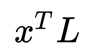

corresponds to the differential value of each node, with respect to its neighbours 

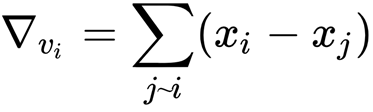

In [16]:
np.matmul(x.T , L)

array([[ 2809,  1910,  6724, ..., -2742, -2742, -2742]])

In [17]:
len(np.matmul(x.T , L)[0]) # which is equal to number of nodes(twitter accounts)

13963

Find **twitter account having highest degree**:

A positive derivative of a node means the Twitter account is more influential(popular) as compared to its neighboring Twitter accounts.

A negative derivative of a node means a Twitter account is not as influential(popular) as compared to its neighboring Twitter accounts.

In [18]:
xTL=np.matmul(x.T , L)
print("id="+str(np.argmax(xTL)),"index="+str(index_id[np.argmax(xTL)]),"\taccount_name="+str(id_name_dict[index_id[np.argmax(xTL)]]),"\thighest derivative value="+str(xTL[0][np.argmax(xTL)]))


id=43 index=1132908407407620096 	account_name=RoyalRajputni 	highest derivative value=13727025


Find **twitter account having least degree**:

In [55]:
print("id="+str(np.argmin(xTL)),"index="+str(index_id[np.argmin(xTL)]),"\tlowest derivative value="+str(xTL[0][np.argmin(xTL)]))

id=334 index=141633175 	lowest derivative value=-10025


The graph derivative is defined as:

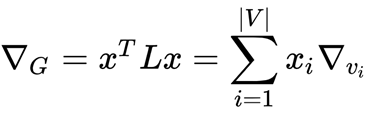

In [20]:
np.matmul(np.matmul(x.T , L),x)

array([[76538116648]])

**Graph derivative = 76538116648**; means twitter network has more positive derivative nodes and it is overall opinion generator.

## **Find graph centralities**

Centrality is an important concept used for graphs to discover the most important nodes. For instance, one can identify the most influential Twitter account on the social network

In [21]:
def find_min_value_details(dictionary,rank):
  min_index=sorted(zip(dictionary.values(), dictionary.keys()))[rank][1]
  min_id=index_id[min_index]
  min_name=""
  if id_name_dict.get(min_id)!=None:
    min_name=id_name_dict[min_id]
  min_val=sorted(zip(dictionary.values(), dictionary.keys()))[rank][0]


  return min_index,min_id,min_name,min_val

def find_max_value_details(dictionary,rank):
  max_index=sorted(zip(dictionary.values(), dictionary.keys()))[-rank][1]
  max_id=index_id[max_index]
  max_name=""
  if id_name_dict.get(max_id)!=None:
    max_name=id_name_dict[max_id]
  max_val=sorted(zip(dictionary.values(), dictionary.keys()))[-rank][0]

  return max_index,max_id,max_name,max_val

## find degree centrality

A node's degree is the number of connections it has. indegree represents the number of incoming edges to that node and outdegree represents the number of outgoing edges from that node.

**Degree centrality** defined as the number of neighbors that a node has divided by the total number of neighbors that the node could have.

Degree centrality is a measure of the extent to which a node can directly affect (influence) other nodes in the graph
here edges represent follower relationship, indegree can be interpreted as a form of popularity. 

Thus, the **higher the degree of a node, the more influential it is in a network**.

In [22]:
#degree of all nodes
dict_deg=nx.degree(G)
dict_deg=sorted(dict_deg, key=lambda x: x[1], reverse=True)
for t in dict_deg[:5]:
  print(t[0],"\t",index_id[t[0]],"\t",id_name_dict[index_id[t[0]]],"\t",t[1])
#Output format:index,id,account_name,degree

43 	 1132908407407620096 	 RoyalRajputni 	 3473
48 	 45036318 	 jawahar4 	 2618
38 	 3930331702 	 VirkAnnie 	 959
47 	 1154178342 	 pokaabhii 	 860
20 	 2212624748 	 OurIndiaFirst19 	 787


In [23]:
deg_centrality = nx.degree_centrality(G)

In [24]:
#Five least influential twitter accounts
print(find_min_value_details(deg_centrality,1))
print(find_min_value_details(deg_centrality,2))
print(find_min_value_details(deg_centrality,3))
print(find_min_value_details(deg_centrality,4))
print(find_min_value_details(deg_centrality,5))
#Output format:index,id,account name, value

(104, '945452161', '2611rachna', 7.23222680263253e-05)
(106, '1107575212248363010', 'NancyGautam01', 7.23222680263253e-05)
(162, '2893774440', 'OMohatta', 7.23222680263253e-05)
(190, '880332042726256640', '', 7.23222680263253e-05)
(191, '948498152105000961', '', 7.23222680263253e-05)


In [25]:
#Five most influential twitter accounts
print(find_max_value_details(deg_centrality,1))
print(find_max_value_details(deg_centrality,2))
print(find_max_value_details(deg_centrality,3))
print(find_max_value_details(deg_centrality,4))
print(find_max_value_details(deg_centrality,5))
#Output format:index,id,account name, value

(43, '1132908407407620096', 'RoyalRajputni', 0.25117523685542775)
(48, '45036318', 'jawahar4', 0.18933969769291964)
(38, '3930331702', 'VirkAnnie', 0.06935705503724596)
(47, '1154178342', 'pokaabhii', 0.062197150502639756)
(20, '2212624748', 'OurIndiaFirst19', 0.05691762493671801)


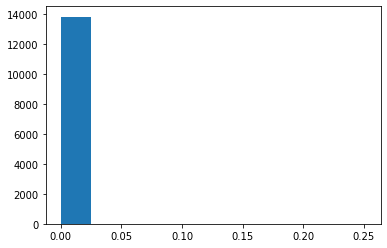

In [26]:
# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_centrality.values()))
plt.show()

## find eigenvector_centrality
In Delhi Roads whenever the traffic police capture a person for breaking the traffic rule, the first sentence that traffic police hears is "Do you know whom I am related to?". Eigenvector centrality is a measure of exactly this. 

**Eigencentrality** is a measure of a node's importance depending on its neighbors. 
In contrast to degree centrality, we may discover nodes that influence the whole network, not simply those that are linked to that node.

**Algorithm steps**:
1. Calculate the eigendecomposition of the pairwise adjacency matrix of the graph.
2. Select the eigenvector associated with the largest eigenvalue.
3. Element i in the eigenvector gives the centrality of the i-th node.

Note: The eigenvector calculation is done by the power iteration method and has no guarantee of convergence.

It determines that a Twitter account is important if it is linked to other important Twitter accounts.

**If a Twitter account is connected to a highly influential Twitter account, it will have a higher Eigencentrality value**.

In [27]:
dict_eigen=nx.eigenvector_centrality(G,max_iter=1000)

In [28]:
#Five least influential twitter accounts
print(find_min_value_details(dict_eigen,1))
print(find_min_value_details(dict_eigen,2))
print(find_min_value_details(dict_eigen,3))
print(find_min_value_details(dict_eigen,4))
print(find_min_value_details(dict_eigen,5))
#Output format:index,id,account name, value

(4702, '1193727911603429376', '', 1.619778378141547e-274)
(4703, '1113527334307553280', '', 1.619778378141547e-274)
(4704, '1192347266981539840', '', 1.619778378141547e-274)
(4705, '1130966223888429056', '', 1.619778378141547e-274)
(4706, '937747351', '', 1.619778378141547e-274)


In [29]:
#Five most influential twitter accounts
print(find_max_value_details(dict_eigen,1))
print(find_max_value_details(dict_eigen,2))
print(find_max_value_details(dict_eigen,3))
print(find_max_value_details(dict_eigen,4))
print(find_max_value_details(dict_eigen,5))
#Output format:index,id,account name, value

(43, '1132908407407620096', 'RoyalRajputni', 0.7070836719470707)
(334, '141633175', '', 0.012377678881972424)
(4760, '1156861810957406209', '', 0.012319095440341701)
(4787, '2991181697', '', 0.01229407615045028)
(1597, '2253142422', '', 0.01228244140128211)


## find closeness centrality
The closeness or minisum measure of a node v, depicted as c(v) is the sum of its distances from all other nodes in the network.

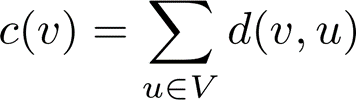

Centrality based on closeness is defined as: 

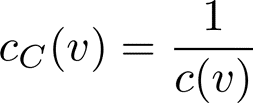

Nodes with highest closeness centrality, also called **graph medians**.
**Higher closeness centrality value for a node means that the node is best placed to influence the network in the shortest time.**


In [30]:
close_centrality = nx.closeness_centrality(G)

In [31]:
#Five least influential twitter accounts
print(find_min_value_details(close_centrality,1))
print(find_min_value_details(close_centrality,2))
print(find_min_value_details(close_centrality,3))
print(find_min_value_details(close_centrality,4))
print(find_min_value_details(close_centrality,5))
#Output format:index,id,account name, value

(4702, '1193727911603429376', '', 0.0006694975668722685)
(4703, '1113527334307553280', '', 0.0006694975668722685)
(4704, '1192347266981539840', '', 0.0006694975668722685)
(4705, '1130966223888429056', '', 0.0006694975668722685)
(4706, '937747351', '', 0.0006694975668722685)


The twitter account with name 'RoyalRajputni' has highest closeness
centrality and it is also the graph median.

In [32]:
#Five most influential twitter accounts
print(find_max_value_details(close_centrality,1))
print(find_max_value_details(close_centrality,2))
print(find_max_value_details(close_centrality,3))
print(find_max_value_details(close_centrality,4))
print(find_max_value_details(close_centrality,5))
#Output format:index,id,account name, value

(43, '1132908407407620096', 'RoyalRajputni', 0.37464071369718954)
(48, '45036318', 'jawahar4', 0.3693126418388933)
(334, '141633175', '', 0.35907051998173944)
(1343, '185142711', '', 0.34445009263436144)
(15, '415456235', 'shripadkatarane', 0.3348801755473761)


## find eccentricity
Eccentricity of a node v is the maximum distance from the node v to any node in the network.
Centrality of a node v based on its eccentricity is defined as: 

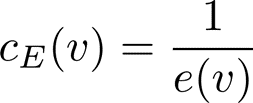

From the results below,  Twitter accounts "shripadkatarane", "raajkmishra", "AbhayYa32148807", "jeetu_1990", "Mithilesh7727" have the lowest eccentricity value of 5. Thus, starting from these Twitter account nodes, one can reach any other Twitter account in at most 5 hops.

In [33]:
nx.is_connected(G)

False

In [34]:
nx.connected_components(G)

<generator object connected_components at 0x7f9f18a02d50>

The network is not completely connected, it has 2 connected components; removing smaller component from graph for further analysis

In [35]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[13809, 19]

In [36]:
#Using only larger component for further analysis
for component in list(nx. connected_components(G)):
  if len(component) < 20: # Size of the largest component.
    for node in component:
      G. remove_node(node)

In [37]:
dict_e=nx.eccentricity(G)

In [38]:
#Five most eccentric nodes(nodes having least eccentricity value)
print(find_min_value_details(dict_e,1))
print(find_min_value_details(dict_e,2))
print(find_min_value_details(dict_e,3))
print(find_min_value_details(dict_e,4))
print(find_min_value_details(dict_e,5))
#Output format:index,id,account name, value

(15, '415456235', 'shripadkatarane', 5)
(17, '20427564', 'raajkmishra', 5)
(31, '1149186898008539136', 'AbhayYa32148807', 5)
(32, '215381051', 'jeetu_1990', 5)
(35, '1093054992917835776', 'Mithilesh7727', 5)


## find Radius 
The radius is the minimum eccentricity.

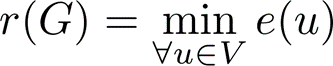

In [39]:
print("Radius: ", nx.radius(G,e=dict_e))

Radius:  5


## find centers
The centres of the graph are the nodes with the least eccentricity.
The center of a graph based on its radius is given by:  

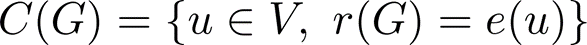

Any twitter account in this network can be reached quickly in the minimum number of steps by starting at the graph center and vice versa.
 
If a graph center tweets something then it will reach every other Twitter account in the minimum number of retweets provided every follower in the path retweets it.

In [40]:
print("Center: ", sorted(list(nx.center(G,e=dict_e))))

Center:  [7, 15, 17, 31, 32, 35, 37, 42, 45, 48, 234, 258, 325, 398, 549, 554, 615, 1433, 1452, 1628, 1744, 1757, 1778, 1800, 1859, 2302, 2552, 2616, 2754, 2945, 3318, 3633, 4580, 5132, 5453, 5478, 5479, 5522, 7091, 7234, 7421, 10951, 11004, 11516, 11525, 11567, 11576, 11606, 11608, 11610, 11624, 11632, 11640, 11650, 11679, 11697, 11744]


In [41]:
#Five least eccentric nodes(nodes having highest eccentricity value)
print(find_max_value_details(dict_e,1))
print(find_max_value_details(dict_e,2))
print(find_max_value_details(dict_e,3))
print(find_max_value_details(dict_e,4))
print(find_max_value_details(dict_e,5))
#Output format:index,id,account name, value

(3431, '1183727994705268737', '', 9)
(3430, '1182202949486776320', '', 9)
(3429, '958300669596741632', '', 9)
(3428, '31766723', '', 9)
(3427, '425628427', '', 9)


## find Diameter
The diameter is the maximum eccentricity.

In [42]:
print("Diameter: ", nx.diameter(G,e=dict_e))

Diameter:  9


## find Preiphery
The periphery is the set of nodes with eccentricity equal to the diameter.



In [43]:
print("Preiphery: ", sorted(list(nx.periphery(G,e=dict_e))))

Preiphery:  [106, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 3199, 3200, 3201, 3202, 3203, 3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3224, 3225, 3226, 3227, 3228, 3229, 3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3255, 3256, 3257, 3258, 3259, 3260, 3261, 3262, 3263, 3264, 3265, 3266, 3267, 3268, 3269, 3270, 3271, 3272, 3416, 3417, 3418, 3419, 3420, 3421, 3422, 3423, 3424, 3426, 3427, 3428, 3429, 3430, 3431]


## find Betweenness centrality
Given two nodes s and t, the betweenness of a graph element (node or edge) v is the ratio of the number of shortest paths between s and t that pass through v:

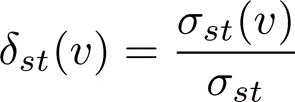

The betweenness centrality of graph element v is its total betweenness for all pairs of nodes in the graph: 

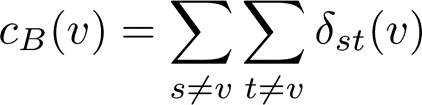

This metric captures a different view of importance - in essence, it captures bottleneck nodes in a graph. Betweenness measures the relative influence or control that a graph element has.

One example would be individuals that bridge between communities, An individual bridging liberal-leaning, and conservative-leaning Twitter users

**If the node has high betweenness centrality then it plays a significant role within the network. A node with a higher betweenness centrality value acts as a bridge between nodes and influences the flow of the Twitter network.** The nodes with high betweenness centrality can have strategic control and influence on others. An individual in such a strategic position can influence the whole group, by either withholding or coloring the information in transmission.

Betweenness centrality is a very slow calculation so I have used approximate measure by considering a random subset of k nodes where k is some number much less than the number of nodes in the network but large enough to be statistically significant (NetworkX has an option for this: betweenness centrality(G, k=myk).

In [44]:
dict_b=nx.betweenness_centrality(G, k=2000)

In [45]:
#Five least influential twitter accounts
print(find_min_value_details(dict_b,1))
print(find_min_value_details(dict_b,2))
print(find_min_value_details(dict_b,3))
print(find_min_value_details(dict_b,4))
print(find_min_value_details(dict_b,5))
#Output format:index,id,account name, value

(104, '945452161', '2611rachna', 0.0)
(106, '1107575212248363010', 'NancyGautam01', 0.0)
(162, '2893774440', 'OMohatta', 0.0)
(190, '880332042726256640', '', 0.0)
(191, '948498152105000961', '', 0.0)


In [46]:
#Five most influential twitter accounts(twitter broadcasters)
print(find_max_value_details(dict_b,1))
print(find_max_value_details(dict_b,2))
print(find_max_value_details(dict_b,3))
print(find_max_value_details(dict_b,4))
print(find_max_value_details(dict_b,5))
#Output format:index,id,account name, value

(43, '1132908407407620096', 'RoyalRajputni', 0.4408518671780568)
(48, '45036318', 'jawahar4', 0.313939571358264)
(38, '3930331702', 'VirkAnnie', 0.14197255836671685)
(47, '1154178342', 'pokaabhii', 0.1042984687235083)
(20, '2212624748', 'OurIndiaFirst19', 0.09882836634039022)


## find PageRank
PageRank algorithm is a variant of eigenvector centrality which assigns scores based on nodes’ neighbors and their neighbors’ neighbors.

**If a node has a higher page rank value means it is more influential than other nodes.**

Page rank diffuses its influence in a DFS manner

In [47]:
pr = nx.pagerank(G, alpha = 0.8)

In [48]:
#Five least influential twitter accounts
print(find_min_value_details(pr,1))
print(find_min_value_details(pr,2))
print(find_min_value_details(pr,3))
print(find_min_value_details(pr,4))
print(find_min_value_details(pr,5))
#Output format:index,id,account name, value

(1589, '959817091716063233', '', 2.788230201185234e-05)
(1590, '14738418', '', 2.788230201185234e-05)
(1594, '94530194', '', 2.788230201185234e-05)
(1595, '108132277', '', 2.788230201185234e-05)
(10921, '1123885511309955075', '', 2.9112946012288716e-05)


In [49]:
#Five most influential twitter accounts
print(find_max_value_details(pr,1))
print(find_max_value_details(pr,2))
print(find_max_value_details(pr,3))
print(find_max_value_details(pr,4))
print(find_max_value_details(pr,5))
#Output format:index,id,account name, value

(43, '1132908407407620096', 'RoyalRajputni', 0.11032393271525426)
(48, '45036318', 'jawahar4', 0.07304819665081982)
(38, '3930331702', 'VirkAnnie', 0.030948312890649223)
(47, '1154178342', 'pokaabhii', 0.02254894269871197)
(32, '215381051', 'jeetu_1990', 0.019938156238790413)


## find hits and authority scores

An algorithm based on the notion of “hubs”(outlinks) and “authorities”(inlinks).

**Algorithm Steps**:
1. Initialize the hub and authority of each node with a value of 1
2. For each iteration, update the hub and authority of every node in the graph
3. The new authority is the sum of the hub of its parents
4. The new hub is the sum of the authority of its children
5. Normalize the scores by dividing each Hub score by square root of the sum of the squares of all Hub scores, and dividing each Authority score by square root of the sum of the squares of all Authority scores.

After enough iterations, hub and authority score will always converge to a specific value.

**A good hub is a twitter account that points to many good authorities**

**A good authority is a twitter account that points to many good hubs**

HITS diffuses it's influence in BFS manner.

The eigenvector calculation is done by the power iteration method and has no guarantee of convergence. The iteration will stop after max_iter iterations or an error tolerance of number_of_nodes(G)*error tolerance has been reached.


In [50]:
tupe_hits_auth=nx.hits(G)

Min and max Hub score

In [51]:
#Five twitter accounts with least hub score
print(find_min_value_details(tupe_hits_auth[0],1))
print(find_min_value_details(tupe_hits_auth[0],2))
print(find_min_value_details(tupe_hits_auth[0],3))
print(find_min_value_details(tupe_hits_auth[0],4))
print(find_min_value_details(tupe_hits_auth[0],5))
#Output format:index,id,account name, value

(452, '1015224885902274560', '', 8.079307944319651e-11)
(453, '1127831053605826561', '', 8.079307944319651e-11)
(454, '1082551035602694145', '', 8.079307944319651e-11)
(455, '1731554581', '', 8.079307944319651e-11)
(459, '801809459248926721', '', 8.079307944319651e-11)


In [52]:
#Five twitter accounts with highest hub score
print(find_max_value_details(tupe_hits_auth[0],1))
print(find_max_value_details(tupe_hits_auth[0],2))
print(find_max_value_details(tupe_hits_auth[0],3))
print(find_max_value_details(tupe_hits_auth[0],4))
print(find_max_value_details(tupe_hits_auth[0],5))
#Output format:index,id,account name, value

(43, '1132908407407620096', 'RoyalRajputni', 0.01643399802914997)
(334, '141633175', '', 0.0002877722945113271)
(4760, '1156861810957406209', '', 0.00028641027090961344)
(4787, '2991181697', '', 0.00028582859008803173)
(1597, '2253142422', '', 0.0002855580900516503)


Min and max Authority score

In [53]:
#Five twitter accounts with least authority score
print(find_min_value_details(tupe_hits_auth[1],1))
print(find_min_value_details(tupe_hits_auth[1],2))
print(find_min_value_details(tupe_hits_auth[1],3))
print(find_min_value_details(tupe_hits_auth[1],4))
print(find_min_value_details(tupe_hits_auth[1],5))
#Output format:index,id,account name, value

(452, '1015224885902274560', '', 8.079334771206878e-11)
(453, '1127831053605826561', '', 8.079334771206878e-11)
(454, '1082551035602694145', '', 8.079334771206878e-11)
(455, '1731554581', '', 8.079334771206878e-11)
(459, '801809459248926721', '', 8.079334771206878e-11)


In [54]:
#Five twitter accounts with highest authority score
print(find_max_value_details(tupe_hits_auth[1],1))
print(find_max_value_details(tupe_hits_auth[1],2))
print(find_max_value_details(tupe_hits_auth[1],3))
print(find_max_value_details(tupe_hits_auth[1],4))
print(find_max_value_details(tupe_hits_auth[1],5))
#Output format:index,id,account name, value

(43, '1132908407407620096', 'RoyalRajputni', 0.016434053627056945)
(334, '141633175', '', 0.00028777227702675597)
(4760, '1156861810957406209', '', 0.00028641025350719664)
(4787, '2991181697', '', 0.0002858285727209235)
(1597, '2253142422', '', 0.0002855580727046122)


## Conclusion

In this work, the Twitter network about the Ayodhya verdict is analyzed and some useful insights are obtained about the network.

Since graph derivative gives a positive value it means it has more positive derivative nodes and it is an overall opinion(or content) generator.

"RoyalRajputni" is the most important Twitter account in this graph according to all mentioned centrality measures and we can say that it is the most influential Twitter account amongst others.

## References

[1] Introduction to Graph Analytics (https://medium.com/analytics-vidhya/introduction-to-graph-analytics-796cbb3c9cd9)

[2] Introduction and Concepts of Centrality (https://towardsdatascience.com/graph-analytics-introduction-and-concepts-of-centrality-8f5543b55de3)

[3] networkx Reference (https://networkx.org/documentation/stable/reference/index.html)

[4] Lecture Slides
